In [1]:
import os
import pandas as pd
import seaborn as sns
import sklearn as sk
import scipy
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans 
import matplotlib as plt

In [3]:
os.chdir(r"C:/Users/kusur/Downloads")
data = pd.read_csv('segmentation data.csv',header='infer')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
data = data.drop(columns=['ID'])

In [7]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [11]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [13]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [15]:
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


<Axes: >

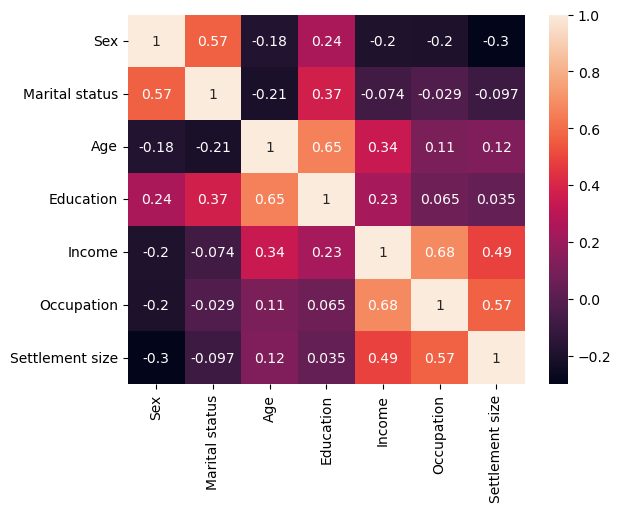

In [17]:
sns.heatmap(data.corr(),annot=True)

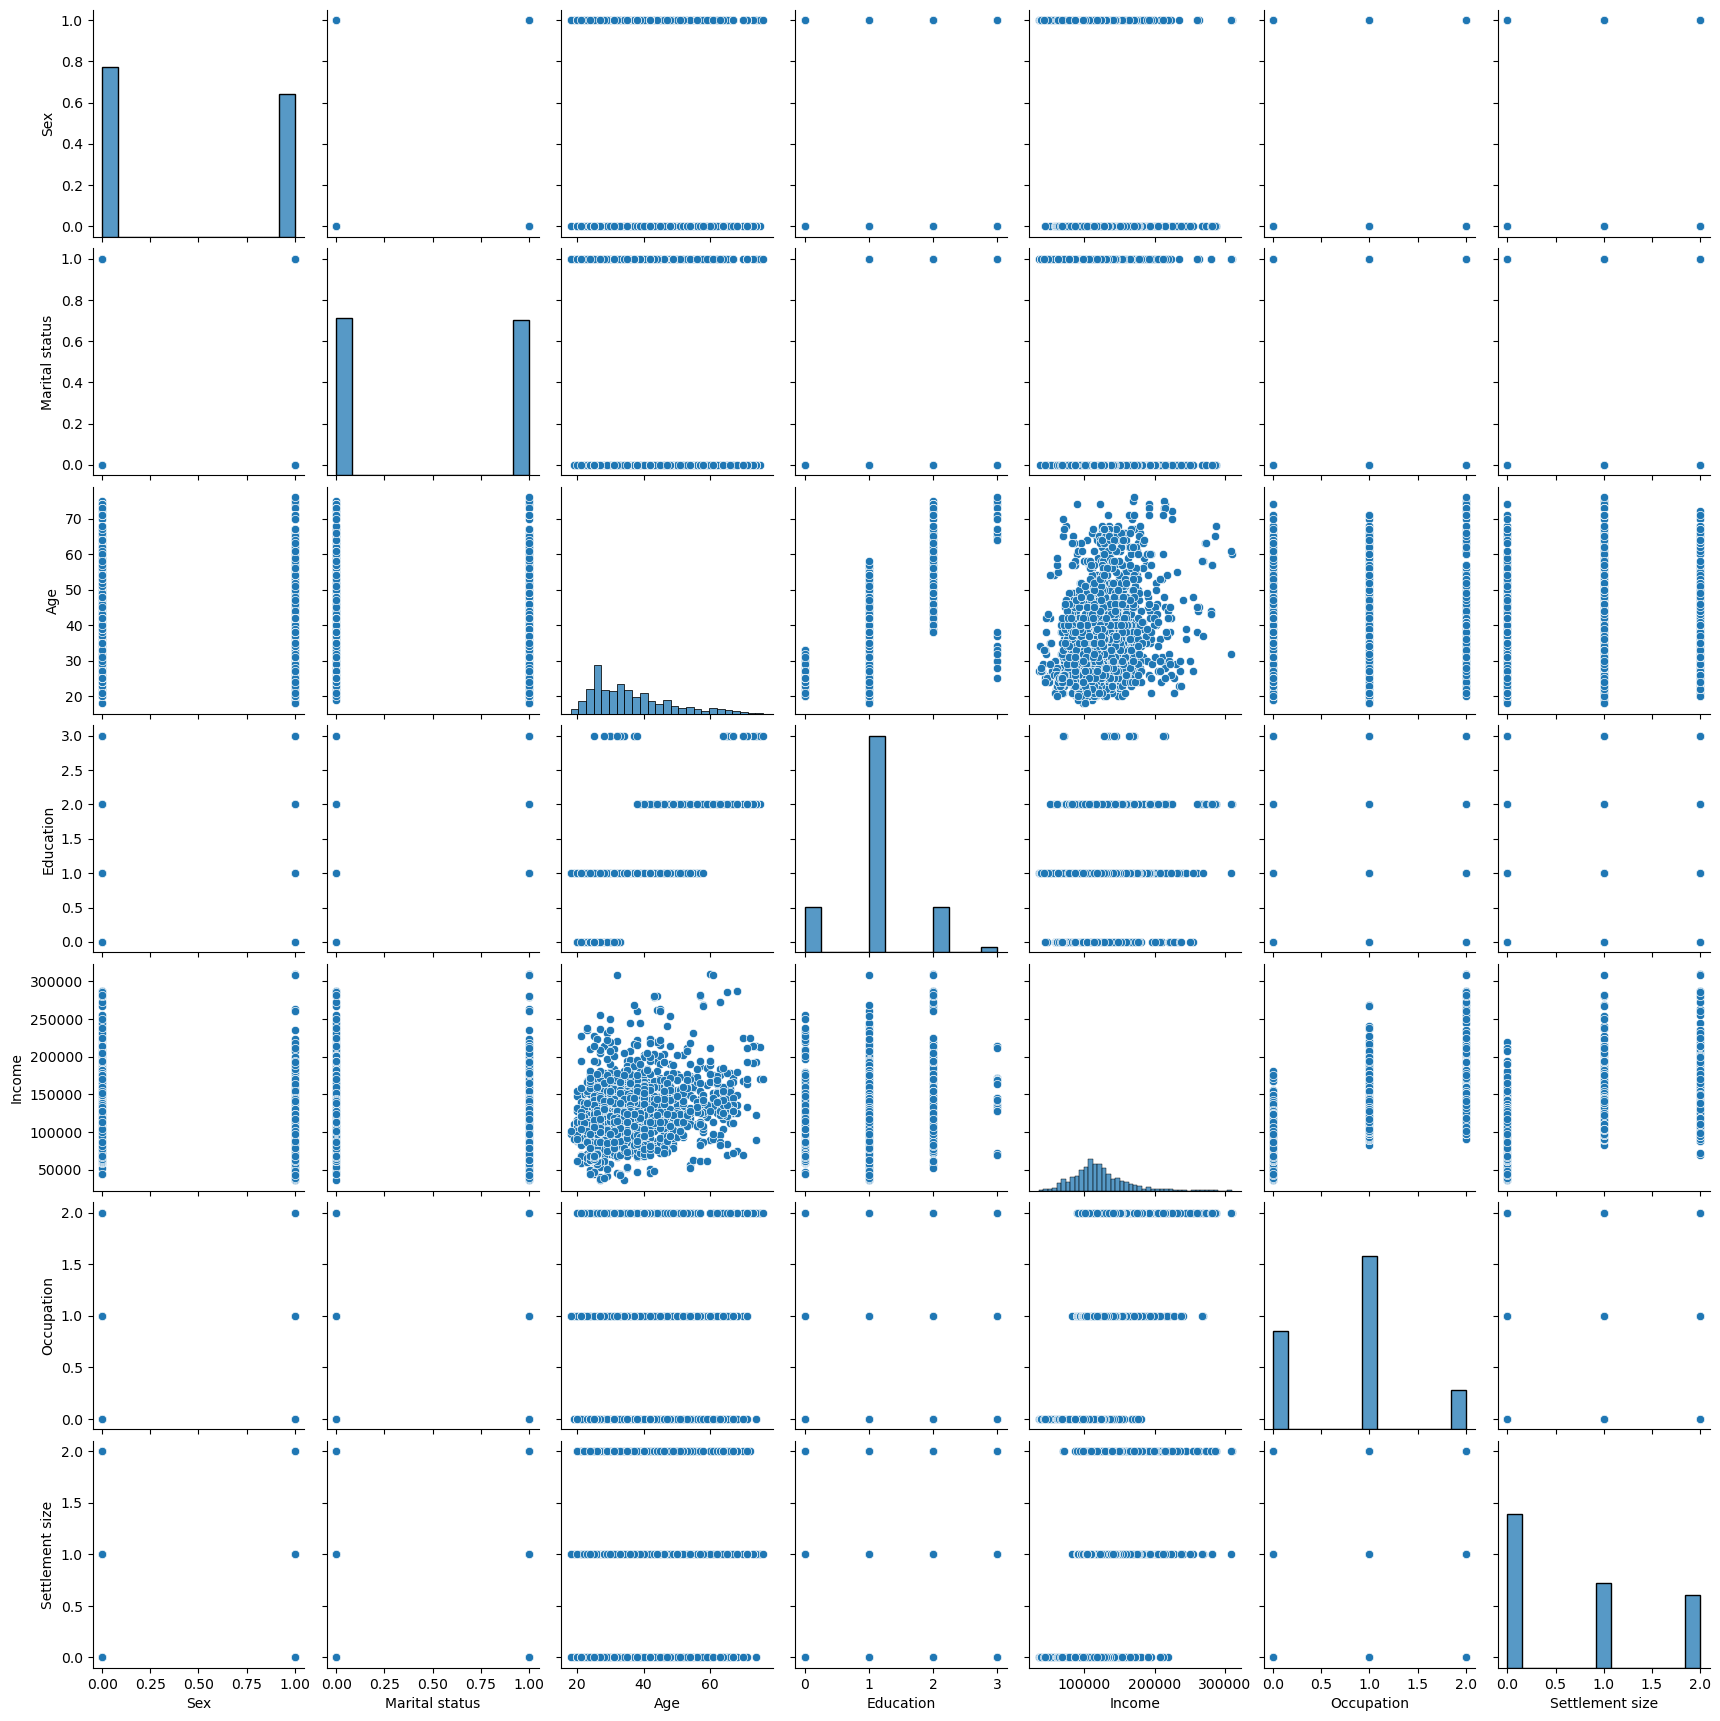

In [19]:
sns.pairplot(data)

<Axes: >

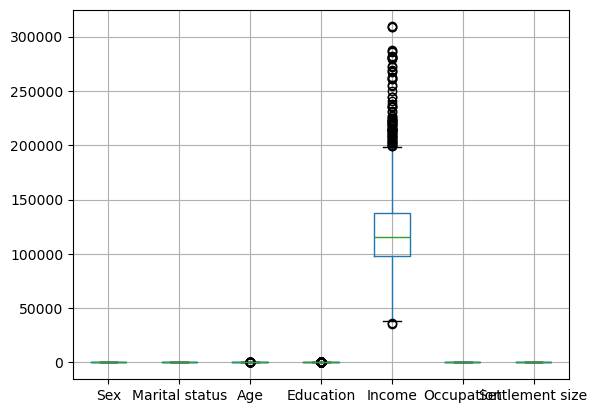

In [20]:
data.boxplot()

In [21]:
data = minmax_scale(data,feature_range=(0,1))

In [25]:
import pickle

pickle.dump(data,open("scale.pk2",'wb'))

In [27]:
names = ['Sex','Martial status','Age','Education','Income','Occupation','Settlement size']
data = pd.DataFrame(data,columns=names)

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = sk.cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

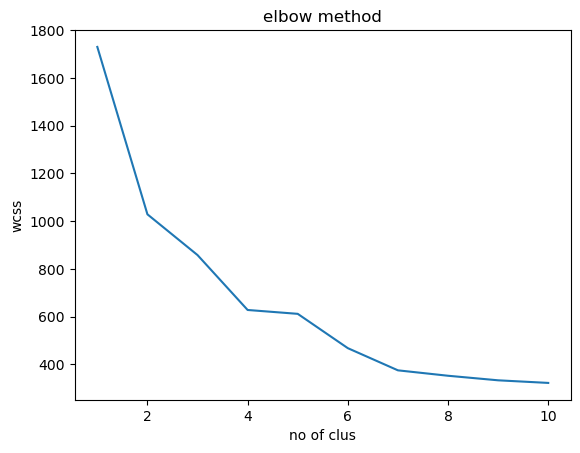

In [31]:
plt.pyplot.plot(range(1,11),wcss) # Use plt directly to call plotting functions
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [33]:
km_model = sk.cluster.KMeans(n_clusters=3,init='k-means++',random_state=0) # Call KMeans directly
ykmeans = km_model.fit_predict(data)

In [35]:
data.head()

,Sex,Martial status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [37]:
data['kclus'] = pd.Series(ykmeans)

In [41]:
data.head(2000)

,Sex,Martial status,Age,Education,Income,Occupation,Settlement size,kclus
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0,0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0,1
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0,2
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5,2
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5,2
...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0,1
1996,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0,1
1997,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0,2
1998,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0,1


In [129]:
y = data['kclus']
x = data.drop(columns=['kclus'],axis=1)

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

rand_model = RandomForestClassifier()
tree_model = tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [135]:
pred = rand_model.predict(x_train)
pred1 = tree_model.predict(x_train)
pred2 = xgb_model.predict(x_train)

from sklearn import metrics

print(metrics.accuracy_score(pred,y_train))
print(metrics.accuracy_score(pred1,y_train))
print(metrics.accuracy_score(pred2,y_train))

1.0
1.0
1.0


In [137]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.9975
0.9975
0.9975


In [139]:
import pickle

pickle.dump(xgb_model,open("xgbmodel.pk2",'wb'))